<a href="https://colab.research.google.com/github/sumanthgm/Maths_Foundation/blob/main/Eigenfaces_Using_PCA_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Eigenfaces

is a method that is useful for face recognition and detection by determining the variance of faces in a collection of face images and use those variances to encode and decode a face in a machine learning way without the full information reducing computation and space complexity. Eigenface is a term first introduced by Sirovich and Kirby in 1987, which is a set of feature basis obtained by principal component analysis (PCA) building on singular value decomposition (SVD), to project the higher-dimensional face-image space to a lower dimension.

A set of eigenfaces can be generated by performing a mathematical process called principal component analysis (PCA) on a large set of images depicting different human faces. Informally, eigenfaces can be considered a set of "standardized face ingredients", derived from statistical analysis of many pictures of faces. Any human face can be considered to be a combination of these standard faces. For example, one's face might be composed of the average face plus 10% from eigenface 1, 55% from eigenface 2, and even −3% from eigenface 3. Remarkably, it does not take many eigenfaces combined together to achieve a fair approximation of most faces. <br>

Facial recognition was the motivation for the creation of eigenfaces. For this use, eigenfaces have advantages over other techniques available, such as the system's speed and efficiency. As eigenface is primarily a dimension reduction method, a system can represent many subjects with a relatively small set of data. As a face-recognition system it is also fairly invariant to large reductions in image sizing; however, it begins to fail considerably when the variation between the seen images and probe image is large.<br>

Applications of Eigenvectors and eigenvalues: <br> <br>
i) Human face detection and recognition <br>
ii) Customer profiling based on demographics as well as their intellect in the purchase. <br>
iii) Banking field in many areas like applicants applied for loans, credit cards, etc. <br>
iv) Finance field to analyze stocks quantitatively, forecasting portfolio returns, also in the interest rate implantation. <br>
v) Healthcare industries in multiple areas like patient insurance data where there are multiple sources of data and with a huge number of variables that are correlated to each other. Sources are like hospitals, pharmacies, etc.<br>

### Dataset used in this work:<br>

For this workbook the labelled face dataset is used. LFWcrop is a cropped version of the Labeled Faces in the Wild (LFW) dataset, keeping only the center portion of each image (i.e. the face). In the vast majority of images almost all of the background is omitted. For each LFW image, the area inside a fixed bounding box was extracted. The bounding box was at the same location for all images, with the upper-left and lower-right corners being (83,92) and (166,175), respectively. The extracted area was then scaled to a size of 64x64 pixels. The selection of the bounding box location was based on the positions of 40 randomly selected LFW faces

The cropped images are stored in the simple pgm (greyscale) and ppm (colour) formats. We have used grayscale images in this notebook.

Following are the steps for Eigen face computation and its usage in human face recognition

In [1]:
import numpy as np
from IPython.display import display, Math, Latex
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Here, we have only taken first 100 of the faces because of the computational complexity but it really doesn’t matter. If you want to go full house then go for it. I also transformed images into numpy array (shaped 1000, 64, 64) for processing.

In [2]:
def plot_faces(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import os
dir='/content/drive/MyDrive/Data - Science (PES)/Sem 1/Maths Foundation/Olympus Data/Session 4/Case Study on Face detection using PCA/PCA for Face detection/face_dataset'
# dir = pd.read_csv("/content/drive/MyDrive/Data - Science (PES)/Sem 1/Maths Foundation/Olympus Data/Session 4/Case Study on Face detection using PCA/PCA for Face detection/face_dataset")

Step1: Read the data file in tool and standardize the data set

In [23]:

# dir='face_dataset/'
celebrity_photos=os.listdir(dir)[1:101]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]


In [21]:
images.shape

(100, 64, 64)

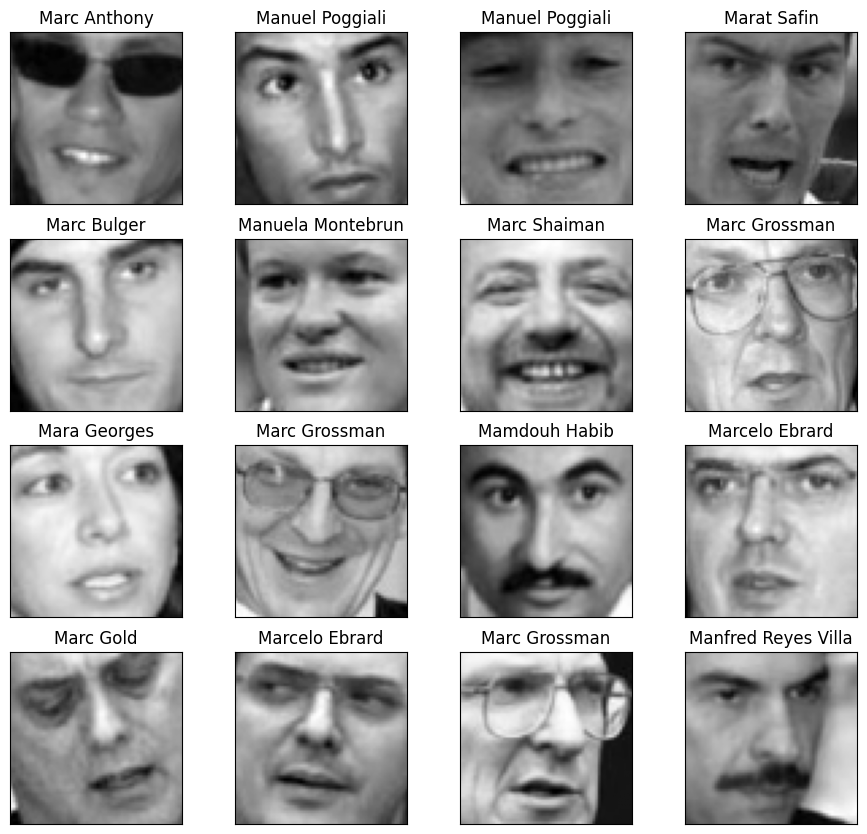

In [22]:
n_samples, h, w = images.shape
plot_faces(images, celebrity_names, h, w, n_row=4, n_col=4)

Step2: Finding out what is the kind of correlation that exists among each one of the variables?

Construct Covariance matrix of data.

There will be evidence from the correlation matrix that few variables are slightly correlated, and few are highly correlated, and few are not.

Principal Component Analysis (PCA)
The main goal of PCA is dimensionality reduction. It has many applications in visualisation, feature extraction, data compression, etc. The idea behind it is to linearly project original data onto a lower dimensional subspace offering the principal components (eigenvectors) maximum variance of the projected data and/or minimum distortion error from the projection.

In [24]:
def pca_component(X, n_pc):
    n_samples, n_features = X.shape

    #Calculate mean of each feature
    mean = np.mean(X, axis=0)

    #Subtract mean (Move origin)
    centered_data = X-mean

    #Calculate Sum of Square distances from Origin to Projection
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]

    return projected, components, mean, centered_data

In [25]:
# Select the most important principal components; here we have selected 150 components
n_components = 150
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca_component(X, n_pc=n_components)


Step 3

Correlation Matrix decomposition of PCA will result in Eigenvalues & Eigenvectors.

Eigenvectors:
Eigenvectors are a list of coefficients which shows how much each input variable contributes to each new derived variable. If we square and add each Eigenvector then we get Eigenvalue.

Eigenvalue:
Represents the proportion of variance explained by each PC. Also represents the largest variance reduction. Sum of all Eigenvalues equals the sum of the variances of all input variables as variance summarization.

In [ ]:
#Compute the Eigenfaces
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]


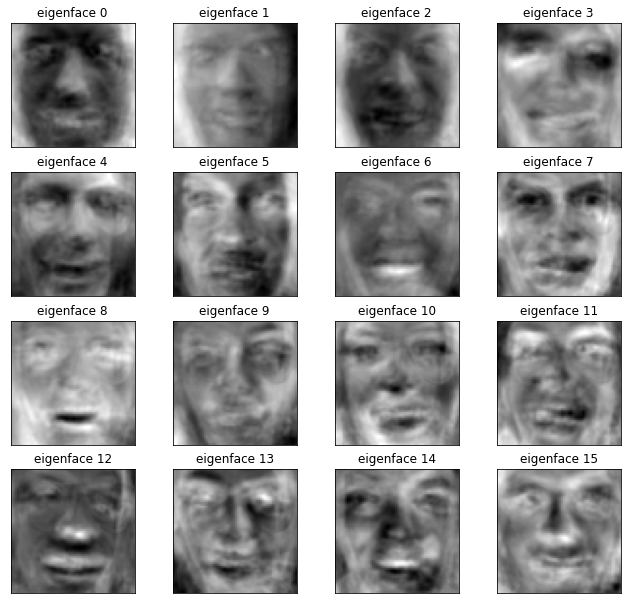

In [ ]:
# Show the first 16 eigenfaces
plot_faces(eigenfaces, eigenface_titles, h, w, 4, 4)

### Reconstruction of the original images:


    
  For reconstruction, we will use those eigenfaces. Each face is a weighted combination of those eigenfaces as you might say. To find weights, we should dot multiply our centered data and eigenfaces. Then, we should weight eigenfaces which gives us the centered face and add it up to the mean face again. After all, we are ready to take a look at the recovered faces compared to original ones.

In [26]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image


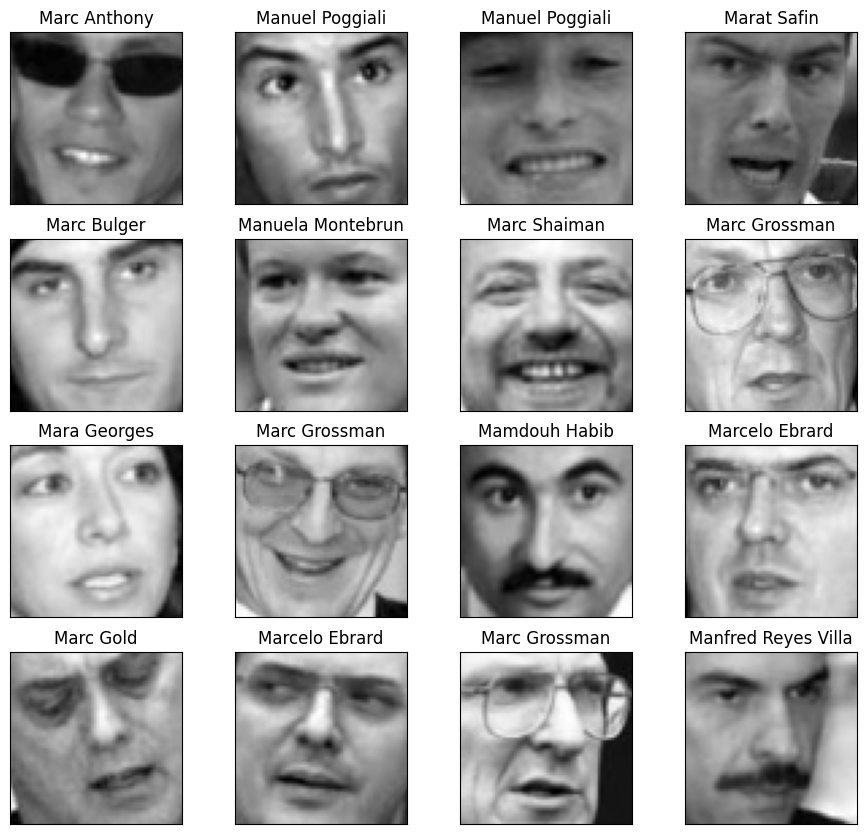

In [27]:
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_faces(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

Given our eigenface vectors, we can represent a new face by taking the dot product between the (flattened) input face image and the N eigenfaces. This allows us to represent each face as a linear combination of principal components:

Query Face = 36% of Eigenface #1 + -8% of Eigenface #2 + … + 21% of Eigenface N

To perform the actual face identification, Sirovich and Kirby proposed taking the Euclidean distance between projected eigenface representations — this is, in essence, a k-NN classifier:

The smaller the Euclidean distance (denoted as the function, d), the more “similar” the two faces are — the overall identification is found by taking the label associated with the face with the smallest Euclidean distance.

In practice, we often don’t rely on a simple k-NN algorithm for identification. Accuracy can be increased by using more advanced machine learning algorithms, such as Support Vector Machines (SVMs), Random Forests, etc. The implementation covered here today will utilize SVMs.

### References

[1] Strang, G., 2006. Linear algebra and its applications. Belmont, CA: Thomson, Brooks/Cole.

[2] Leon, S.J., De Pillis, L. and De Pillis, L.G., 2006. Linear algebra with applications (p. 552). Upper Saddle River, NJ: Pearson Prentice Hall.    